# 4.09 Intro to Data Visualization with Python PART 2

## 02 Create:
#### a) bar chart
#### b) histogram
#### c) a scatterplot
#### d) a line chart (using a sample subset)

## 03 Create a histogram of the “order_hour_of_day” column.
#### a) Histogram
#### b) Describe what the histogram demonstrates

## 04 Create a bar chart from the “loyalty_flag” column.

## 05 Check whether there’s a difference in expenditure depending on the hour of the day.

## 06 Conduct some exploratory analysis of customer demographics 
#### a) Determine whether there’s a connection between age and family situation
#### b) Describe what the line chart shows

## 07 Explore whether there’s a connection between age and spending power (income).
#### a)Create a scatterplot using the sns.scatterplot() function.
#### b) Describe what the scatterplot shows.

## 08 Export your visualizations as “.png” files

In [17]:
#import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy

# import dataframe

pathData = r'C:\Users\Michael\Desktop\Career Foundry\02 Data Immersion Course\04 Python Fundamentals for Data Analysts\Instacart Basket Analysis 2023 11'
ords_prods_cust_merge = pd.read_pickle(os.path.join(pathData, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

In [5]:
ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,mean_spend,order_frequency,order_frequency_flag,Gender,customer_state,customer_age,date_joined,customer_dependants,fam_status,customer_income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## 02
See script:
4.09 Intro to Data Visualization with Python EXAMPLES

## 03 Create a histogram of the “order_hour_of_day” column.
#### a) Histogram

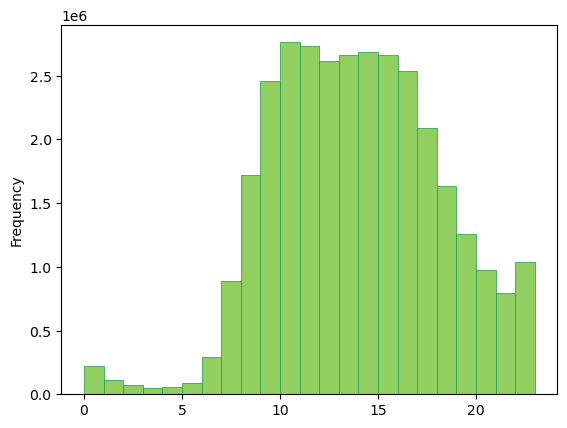

In [16]:
hist = ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins = 23, color = '#91cf60', ec = '#1a9850', lw = 0.5)

In [11]:
hist.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'hist_order_hour.png'))

#### b) Describe what the histogram demonstrates

The histogram shows that the number of orders increases from 0300 (where it is lowest) to 0900 where it remains peak hours until 1700 where it begins to fall again.

## 04 Create a bar chart from the “loyalty_flag” column.

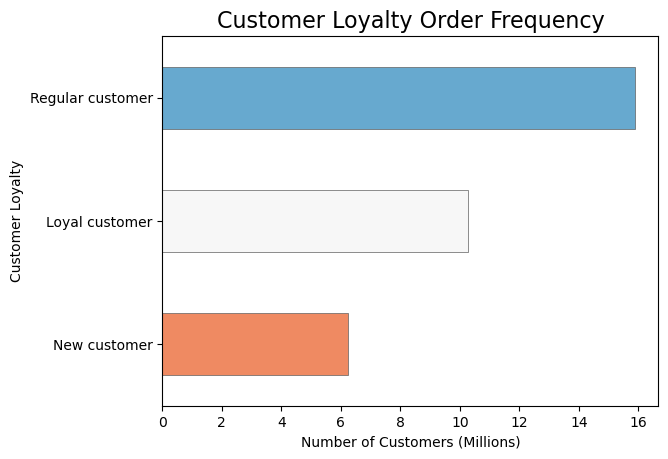

In [22]:
colourSet = ['#ef8a62', '#f7f7f7', '#67a9cf']
order = ['New Customer', 'Regular customer', 'Loyal customer']
bar = ords_prods_cust_merge['loyalty_flag'].value_counts().sort_values().plot.barh(
    color = colourSet, ec = '#606060', lw = 0.5,
    ylabel="Customer Loyalty", xlabel="Number of Customers (Millions)"
    )

plt.title("Customer Loyalty Order Frequency", fontsize=16)
bar.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')))

In [23]:
bar.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'bar_loyalty_freq.png'))

## 05 Check whether there’s a difference in expenditure depending on the hour of the day.
#### a) create sample

In [33]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

big = ords_prods_cust_merge[dev]
small = ords_prods_cust_merge[~dev]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

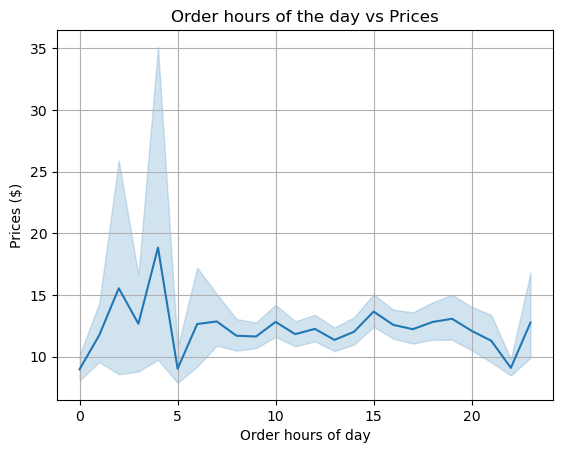

In [56]:
small_plot = small[['order_hour_of_day','prices']]
line = sns.lineplot(data = small_plot, x = 'order_hour_of_day', y = 'prices')
line.set(xlabel='Order hours of day', ylabel = 'Prices ($)')
plt.title('Order hours of the day vs Prices')
plt.grid()

In [36]:
line.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'line_hourly_expendature.png'))

## 06 Conduct some exploratory analysis of customer demographics 
#### a) Determine whether there’s a connection between age and family situation


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

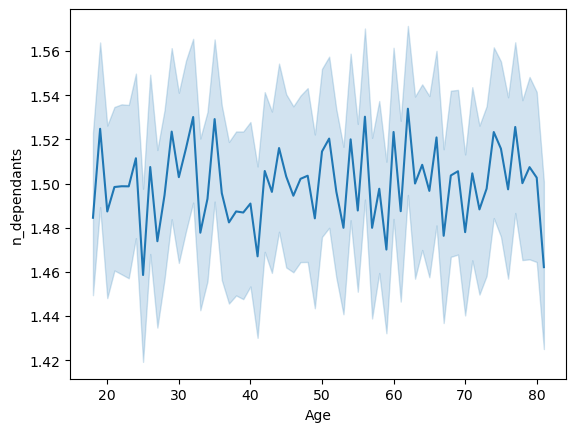

In [43]:
# line chart exploring of age and number of dependents

customers = pd.read_csv(os.path.join(pathData, '02 Data', 'Original Data', 'customers.csv'))
customers_plot = customers[['Age', 'n_dependants']]
line = sns.lineplot(data = customers, x = 'Age', y = 'n_dependants')

#### b) Describe what the line chart shows
The line chart show there is no correlation between age and the number of dependants.

## 07 Explore whether there’s a connection between age and spending power (income).
#### a) Create a scatterplot using the sns.scatterplot() function.
#### b) Describe what the scatterplot shows.

In [60]:
customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


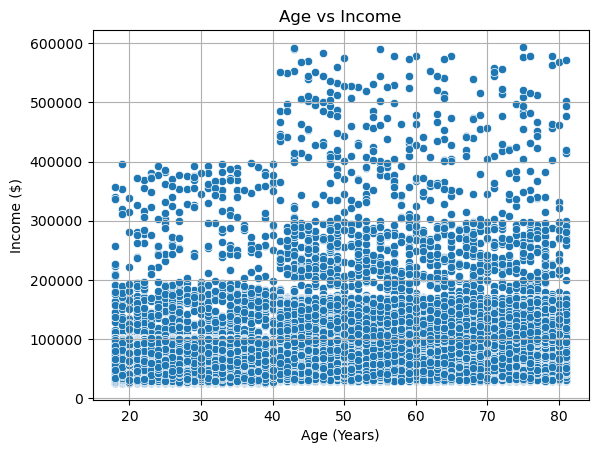

In [62]:
age_dependants = customers[['Age','income']]
scatter_age_income = sns.scatterplot(x='Age', y='income', data = age_dependants)
plt.grid()
plt.title('Age vs Income')
scatter_age_income.set(xlabel='Age (Years)', ylabel='Income ($)')

In [64]:
scatter_age_income.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'age_income.png'))

## Bar chart of item price groupings

In [2]:
ords_prods_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               object 
 1   user_id                object 
 2   order_number           int64  
 3   orders_day_of_week     int64  
 4   order_hour_of_day      int64  
 5   days_since_last_order  float64
 6   product_id             object 
 7   add_to_cart_order      int64  
 8   reordered              int64  
 9   product_name           object 
 10  aisle_id               int64  
 11  department_id          int64  
 12  prices                 float64
 13  price_range_loc        object 
 14  busiest_days           object 
 15  busiest_period_of_day  object 
 16  max_order              int64  
 17  loyalty_flag           object 
 18  mean_spend             object 
 19  order_frequency        float64
 20  order_frequency_flag   object 
 21  Gender                 object 
 22  customer_state  

In [3]:
ords_prods_cust_merge['price_range_loc'].value_counts()

price_range_loc
Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: count, dtype: int64

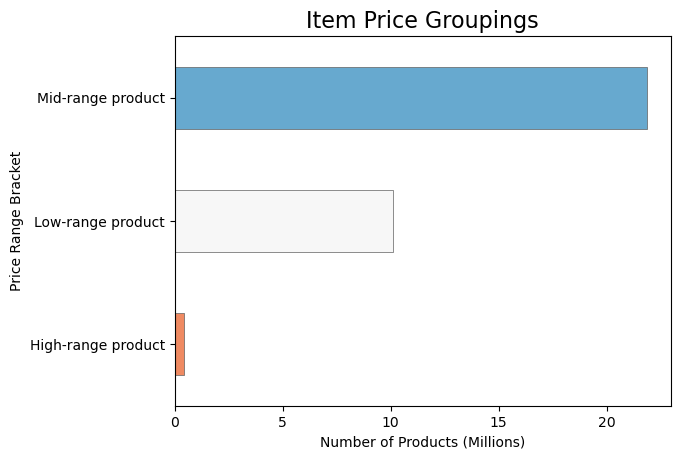

In [6]:
colourSet = ['#ef8a62', '#f7f7f7', '#67a9cf']
order = ['Low-range product', 'Mid-range product', 'High-range product']
price_range = ords_prods_cust_merge['price_range_loc'].value_counts().sort_values().plot.barh(
    color = colourSet, ec = '#606060', lw = 0.5,
    ylabel="Price Range Bracket", xlabel="Number of Products (Millions)"
    )

plt.title("Item Price Groupings", fontsize=16)
price_range.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')))

price_range.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'price_range.png'))

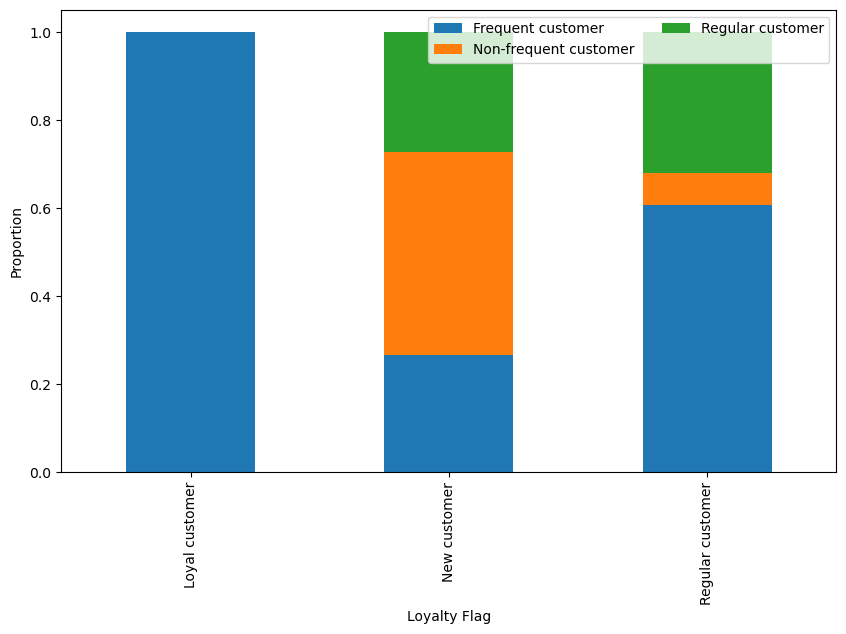

In [18]:
loyalty_spend_norm = pd.crosstab(
    ords_prods_cust_merge['loyalty_flag'], ords_prods_cust_merge['order_frequency_flag'],
    dropna = False,
    normalize="index")

loyalty_spend_plot = loyalty_spend_norm.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="best", ncol=2)
plt.xlabel("Loyalty Flag")
plt.ylabel("Proportion")
plt.show()

loyalty_spend_plot.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'loyalty_spend_plot.png'))